In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('telecom_churn_data.csv')

In [3]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


**Data Cleaning Steps:**
- Mobile No should be unique
- arpu_6, arpu_7 are important

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
print(list(df.columns))

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou

In [6]:
df['arpu_6'].head(20)

0      197.385
1       34.047
2      167.690
3      221.338
4      261.636
5       50.258
6      429.023
7     1069.180
8      378.721
9      119.518
10       0.400
11     298.126
12      48.570
13     492.846
14      63.611
15      31.000
16     430.975
17     690.008
18       4.000
19     163.430
Name: arpu_6, dtype: float64

In [7]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])

In [8]:
null_df.sort_values(by='C',ascending=False).head(50)

,C
arpu_3g_6,74.846748
night_pck_user_6,74.846748
total_rech_data_6,74.846748
arpu_2g_6,74.846748
max_rech_data_6,74.846748
fb_user_6,74.846748
av_rech_amt_data_6,74.846748
date_of_last_rech_data_6,74.846748
count_rech_2g_6,74.846748
count_rech_3g_6,74.846748


# Step 1: Filtering High Value Customers

**Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).**

**Hence, the columns to be considered are: total_rech_amt_6, total_rech_amt_7, av_rech_amt_data_6, av_rech_amt_data_7, total_rech_data_6, total_rech_data_7.**     

In [9]:
#Checking the nulls in the dataset for these particular columns
print(df['total_rech_amt_6'].isnull().sum())
print(df['total_rech_amt_7'].isnull().sum())
print(df['av_rech_amt_data_6'].isnull().sum())
print(df['av_rech_amt_data_7'].isnull().sum())
print(df['total_rech_data_6'].isnull().sum())
print(df['total_rech_data_7'].isnull().sum())

0
0
74846
74428
74846
74428


In [10]:
#Imputing the missing values with zeros
df['av_rech_amt_data_6'] = df['av_rech_amt_data_6'].fillna(0)
df['av_rech_amt_data_7'] = df['av_rech_amt_data_7'].fillna(0)
df['total_rech_data_6'] = df['total_rech_data_6'].fillna(0)
df['total_rech_data_7'] = df['total_rech_data_7'].fillna(0)

**Similarly, we take the same decision to impute the missing values as zeroes for corresponding columns in action phase 8.**

In [11]:
print(df['total_rech_amt_8'].isnull().sum())
print(df['av_rech_amt_data_8'].isnull().sum())
print(df['total_rech_data_8'].isnull().sum())

0
73660
73660


In [12]:
#Imputing the missing values with zeroes for the corresponding columns in the action phase - 8
df['av_rech_amt_data_8'] = df['av_rech_amt_data_8'].fillna(0)
df['total_rech_data_8'] = df['total_rech_data_8'].fillna(0)

In [13]:
#Finding the totals for months 6 and 7 
df['voice_recharge_good'] = df['total_rech_amt_6'] + df['total_rech_amt_7']/2

In [14]:
#Finding the total recharge data amount for months 6 and 7
df['data_recharge_good'] = (df['av_rech_amt_data_6']*df['total_rech_data_6']+df['av_rech_amt_data_7']*df['total_rech_data_7'])/2

In [15]:
#Average recharge amount for months 6 & 7
df['rech_amt_good'] = df['voice_recharge_good']+df['data_recharge_good']

In [16]:
#Finding the 70th percentile for finding the high value customers
high_val = df['rech_amt_good'].quantile(0.7)

In [17]:
print(high_val)

677.0


In [18]:
df['highvalcust'] = df['rech_amt_good'].apply(lambda x: 1 if x>high_val else 0)

In [19]:
df[['highvalcust','rech_amt_good']]

,highvalcust,rech_amt_good
0,1,740.0
1,0,343.0
2,0,325.5
3,0,385.0
4,0,399.0
...,...,...
99994,0,115.0
99995,0,165.0
99996,0,158.0
99997,1,1792.5


In [20]:
df['highvalcust'].value_counts()

0    70023
1    29976
Name: highvalcust, dtype: int64

In [21]:
df = df[df['highvalcust']==1]

In [22]:
df.shape

(29976, 230)

In [23]:
#Check nulls again

In [24]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])

In [25]:
null_df.sort_values(by='C',ascending=False).head(50)

,C
max_rech_data_9,52.098345
fb_user_9,52.098345
date_of_last_rech_data_9,52.098345
arpu_3g_9,52.098345
av_rech_amt_data_9,52.098345
total_rech_data_9,52.098345
arpu_2g_9,52.098345
night_pck_user_9,52.098345
count_rech_2g_9,52.098345
count_rech_3g_9,52.098345


# Step 2: Creating the column - Churn

**As per assignment guidelines: Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:**
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [26]:
#Checking the nulls
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()/len(df.index)*100

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [27]:
#Checking the nulls
df[['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']].isnull().sum()/len(df.index)*100

total_ic_mou_8    0.0
total_og_mou_8    0.0
vol_2g_mb_8       0.0
vol_3g_mb_8       0.0
dtype: float64

In [28]:
#Describe these columns
df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,29976.000000,29976.000000,29976.000000,29976.000000
mean,265.602725,505.338067,85.105071,333.547165
std,358.114302,657.521776,274.083497,940.582929
min,0.000000,0.000000,0.000000,0.000000
25%,51.475000,55.087500,0.000000,0.000000
50%,159.890000,302.695000,0.000000,0.000000
75%,344.322500,701.817500,29.552500,252.565000
max,7785.730000,11140.110000,8993.950000,39221.270000


In [29]:
#Finding the total usage in Month 9
df['total_usage_9'] = df['total_ic_mou_9']+df['total_og_mou_9']+df['vol_2g_mb_9']+df['vol_3g_mb_9']

In [30]:
#Creating the column - churn using the total usage in Month 9
df['churn'] = df['total_usage_9'].apply(lambda x: 0 if x>0 else 1)

In [31]:
#Here we confirm if the churn column was prepared properly
print(df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']])

       total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9  churn
0                0.00            0.00         0.00         0.00      1
7                0.00            0.00         0.00         0.00      1
8               34.91          142.18         0.00         0.00      0
16             334.56          255.74         0.00         0.00      0
17              87.13          631.08         0.00         0.00      0
...               ...             ...          ...          ...    ...
99984          149.26           14.44       723.41       232.56      0
99986          547.11         1095.24         9.14       941.48      0
99988          265.84          182.16         0.05       393.34      0
99997            2.21            0.00        85.67      4177.14      0
99998            0.00            0.00         0.00         0.00      1

[29976 rows x 5 columns]


In [32]:
#Find the value_counts for the churn
df['churn'].value_counts()

0    27350
1     2626
Name: churn, dtype: int64

**Hence, there are 2433 people who have churned out of the 29953. Lets visualize it better in a pie chart.**

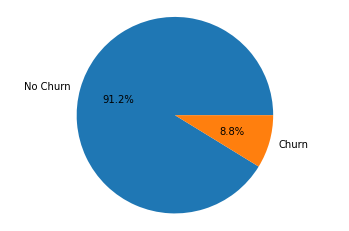

This is a class imbalance problem , which will be later handled using SMOTE technique


In [33]:
#Pie chart for the target variable - Churn
labels = ['No Churn','Churn']
sizes = [df['churn'].value_counts()[0],df['churn'].value_counts()[1]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()
plt.show()
print('This is a class imbalance problem , which will be later handled using SMOTE technique')

**As we have created the desired column 'churn', we can now remove all the columns for month 9 as guided in the problem statement.**

In [34]:
text = '_9'
filtered_9 = list(filter(lambda x: True if text in x else False,list(df.columns)))

In [35]:
filtered_9

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

In [36]:
#Dropping the columns for September
df = df.drop(filtered_9,axis = 1)

In [37]:
#No of columns
df.shape

(29976, 177)

**Understanding all the columns in filtered_9 but for 6,7,8 & then find:**
1. What will be the derived columns? 

**Other strategies:**
1. Non date columns: We can find average for 6 & 7, and then subtract from 8 to see change in behaviour
2. Date columns: Find no of days from end of september to last recharge, between two recharges

In [38]:
#Categorical columns
columns_list=df.select_dtypes(include=['object']).columns.to_list()
print(columns_list)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [39]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])

In [40]:
null_df.sort_values(by='C',ascending=False).head(50)

,C
count_rech_2g_8,49.809848
date_of_last_rech_data_8,49.809848
arpu_3g_8,49.809848
fb_user_8,49.809848
arpu_2g_8,49.809848
max_rech_data_8,49.809848
count_rech_3g_8,49.809848
night_pck_user_8,49.809848
date_of_last_rech_data_7,47.641446
max_rech_data_7,47.641446


# Step 3: Null Value Treatment

**Dealing with the Date columns**

In [41]:
df[columns_list].isnull().sum()/len(df.index)*100

last_date_of_month_6         0.000000
last_date_of_month_7         0.156792
last_date_of_month_8         0.663864
date_of_last_rech_6          0.133440
date_of_last_rech_7          0.543768
date_of_last_rech_8          2.138377
date_of_last_rech_data_6    47.117694
date_of_last_rech_data_7    47.641446
date_of_last_rech_data_8    49.809848
dtype: float64

In [42]:
df['last_date_of_month_6'].value_counts()

6/30/2014    29976
Name: last_date_of_month_6, dtype: int64

In [43]:
df['last_date_of_month_7'].value_counts()

7/31/2014    29929
Name: last_date_of_month_7, dtype: int64

In [44]:
df['date_of_last_rech_6'].value_counts()

6/30/2014    8609
6/29/2014    5512
6/28/2014    3765
6/27/2014    3151
6/26/2014    1841
6/25/2014    1326
6/24/2014    1031
6/23/2014     688
6/21/2014     623
6/22/2014     502
6/14/2014     456
6/20/2014     386
6/17/2014     377
6/19/2014     362
6/18/2014     347
6/16/2014     192
6/13/2014     166
6/12/2014     160
6/15/2014     134
6/11/2014      75
6/8/2014       49
6/7/2014       34
6/10/2014      32
6/9/2014       27
6/5/2014       22
6/3/2014       20
6/4/2014       15
6/6/2014       14
6/2/2014       12
6/1/2014        8
Name: date_of_last_rech_6, dtype: int64

**Based on the date columns, we are doing the following:**
1. Dropping the columns: date_of_last_rech_data because there are too many nulls (>40%) in these columns and no imputation method will be suitable for this column as it represents the last date of data recharge. 
2. Dropping the null rows for columns: date_of_last_rech because it is less 2 percent data and can be removed.
3. Imputing the null rows for columns: last_date_of_month with the respective last date of each month. It will be used.

**For other continuous columns which have null values, we are imputing them as zeros.**

In [45]:
#Dropping the columns date_of_last_rech_data
df = df.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis = 1)

In [46]:
#Dropping the null rows for columns: date_of_last_rech
df = df[~(df['date_of_last_rech_6'].isnull())]
df = df[~(df['date_of_last_rech_7'].isnull())]
df = df[~(df['date_of_last_rech_8'].isnull())]

In [47]:
#Categorical columns
columns_list=df.select_dtypes(include=['object']).columns.to_list()
print(columns_list)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [48]:
#Categorical columns
columns_list=df.select_dtypes(include=['object']).columns.to_list()
print(columns_list)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [49]:
df[columns_list].isnull().sum()/len(df.index)*100

last_date_of_month_6    0.0
last_date_of_month_7    0.0
last_date_of_month_8    0.0
date_of_last_rech_6     0.0
date_of_last_rech_7     0.0
date_of_last_rech_8     0.0
dtype: float64

In [50]:
df.shape

(29228, 174)

**Handling the columns: night_pck_user & fb_user**

In [51]:
df.pivot_table(values = 'churn', 
                      index = 'night_pck_user_6',  
                      aggfunc = 'sum')

,churn
night_pck_user_6,
0.0,884
1.0,30


In [52]:
df.pivot_table(values = 'churn', 
                      index = 'night_pck_user_7',  
                      aggfunc = 'sum')

,churn
night_pck_user_7,
0.0,766
1.0,19


In [53]:
df.pivot_table(values = 'churn', 
                      index = 'night_pck_user_8',  
                      aggfunc = 'sum')

,churn
night_pck_user_8,
0.0,426
1.0,9


**Seeing the night_pck_user in Good & action phases, we conclude that this is not affecting churn much. These columns can be dropped.**

In [54]:
df = df.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_8'],axis=1)

In [55]:
df.shape

(29228, 171)

In [56]:
fb_user_columns = ['fb_user_6','fb_user_7','fb_user_8']

**As mentioned earlier, the rest of the columns which are continuous in nature can be imputed as zeros.**

In [57]:
df = df.fillna(0)

In [58]:
null_df = pd.DataFrame(df.isnull().sum()/len(df.index)*100,columns=['C'])

In [59]:
null_df.sort_values(by='C',ascending=False).head(50)

,C
mobile_number,0.0
last_day_rch_amt_7,0.0
total_rech_amt_8,0.0
max_rech_amt_6,0.0
max_rech_amt_7,0.0
max_rech_amt_8,0.0
date_of_last_rech_6,0.0
date_of_last_rech_7,0.0
date_of_last_rech_8,0.0
last_day_rch_amt_6,0.0


# Step 4: Exploratory Data Analysis

Below columns contains 0 values. Hence removing

In [60]:
zero_col = ['std_og_t2c_mou_6','std_ic_t2o_mou_6','std_og_t2c_mou_7','std_ic_t2o_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_8']
df.loc[:,zero_col].describe()

,std_og_t2c_mou_6,std_ic_t2o_mou_6,std_og_t2c_mou_7,std_ic_t2o_mou_7,std_og_t2c_mou_8,std_ic_t2o_mou_8
count,29228.0,29228.0,29228.0,29228.0,29228.0,29228.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
df = df.drop(zero_col,axis=1)

**Combining all the columns of 6 & 7 into new columns for the good phase having avg values.**

In [62]:
#Categorical columns
columns_list=df.select_dtypes(exclude=['object']).columns.to_list()
print(columns_list)

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7

In [63]:
used_column  = ['total_rech_amt_6','total_rech_amt_7','av_rech_amt_data_6','av_rech_amt_data_7','total_rech_data_6','total_rech_data_7']
for column in used_column: columns_list.remove(column)
df = df.drop(used_column,axis=1)

In [64]:
for  column in columns_list:
    if '_6' in column:
        print(column)
        print(df[column].value_counts())
        print()

arpu_6
0.000      103
130.450     12
213.818      7
213.839      6
130.449      5
          ... 
176.078      1
747.199      1
323.485      1
354.242      1
351.408      1
Name: arpu_6, Length: 28564, dtype: int64

onnet_mou_6
0.00       1943
0.26         17
1.01         16
5.01         15
0.25         15
           ... 
225.41        1
317.83        1
278.11        1
193.79        1
1008.64       1
Name: onnet_mou_6, Length: 17333, dtype: int64

offnet_mou_6
0.00       1022
0.61         11
2.08          8
0.08          8
13.24         7
           ... 
223.48        1
1261.99       1
387.36        1
373.29        1
445.58        1
Name: offnet_mou_6, Length: 21347, dtype: int64

roam_ic_mou_6
0.00      22903
1.01         13
0.53         12
0.71         12
0.86         12
          ...  
27.11         1
157.43        1
96.59         1
345.18        1
25.66         1
Name: roam_ic_mou_6, Length: 4062, dtype: int64

roam_og_mou_6
0.00      22881
0.21         12
0.60         10
1.01      

In [65]:
cat_column  = ['fb_user_6']
for column in cat_column: columns_list.remove(column)

In [66]:
for  column in columns_list:
    if '_6' in column:
        column = column.replace('_6','')
        df['{}_good'.format(column)] = (df['{}_6'.format(column)] + df['{}_7'.format(column)])/2
        df = df.drop(['{}_6'.format(column),'{}_7'.format(column)],axis=1)

In [67]:
df.shape

(29228, 115)

In [68]:
#Categorical columns
columns_list=df.select_dtypes(exclude=['object']).columns.to_list()
print(columns_list)

['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'arpu_2g_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 

In [69]:
#Creating a function for plotting categorical data using Boxplots
def plot_categorical_data(df,xdata,ydata):
    plt.figure(figsize=(10,5))
    sns.boxplot(x=xdata,y=ydata, data=df)
    plt.show()

mobile_number


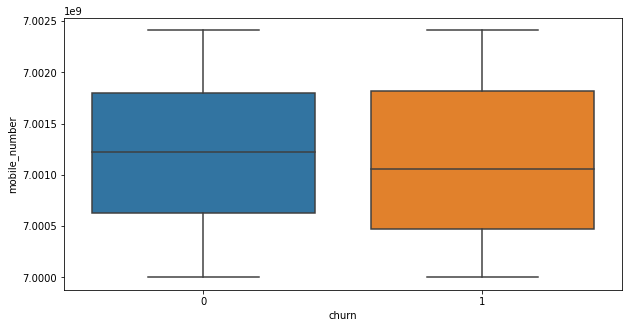

circle_id


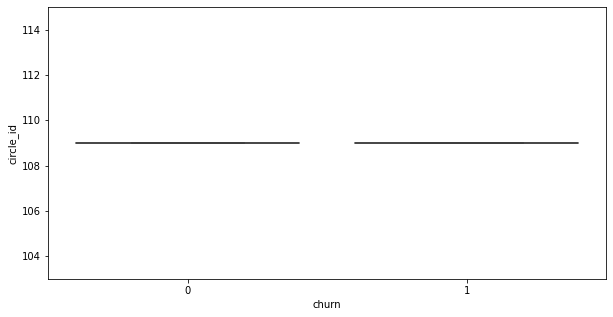

loc_og_t2o_mou


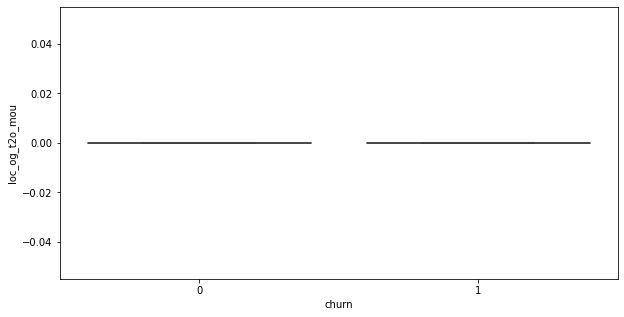

std_og_t2o_mou


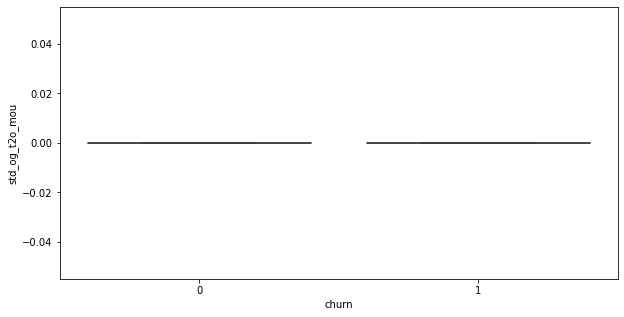

loc_ic_t2o_mou


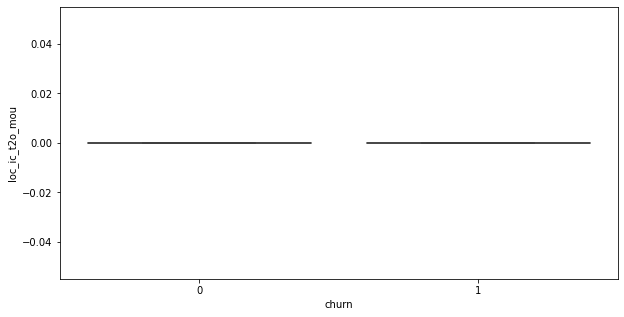

arpu_8


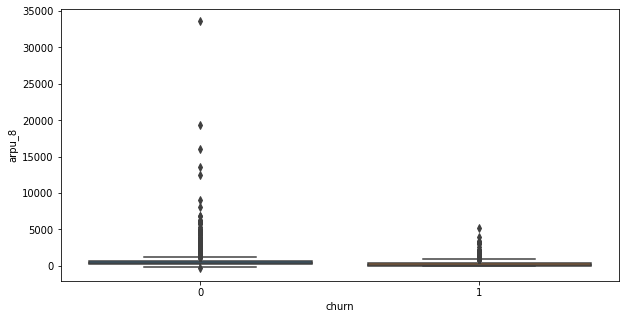

onnet_mou_8


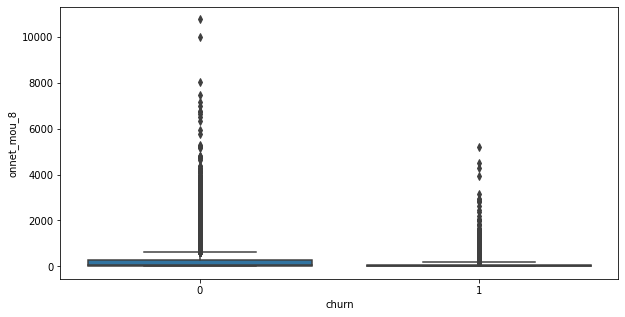

offnet_mou_8


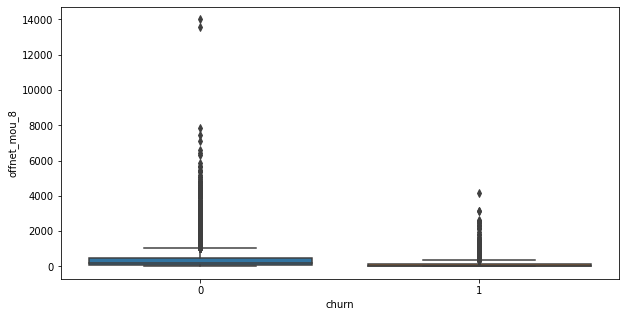

roam_ic_mou_8


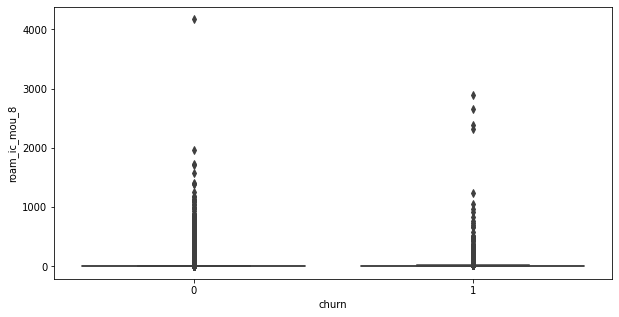

roam_og_mou_8


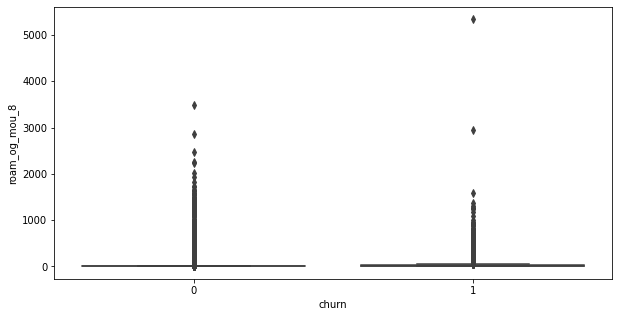

loc_og_t2t_mou_8


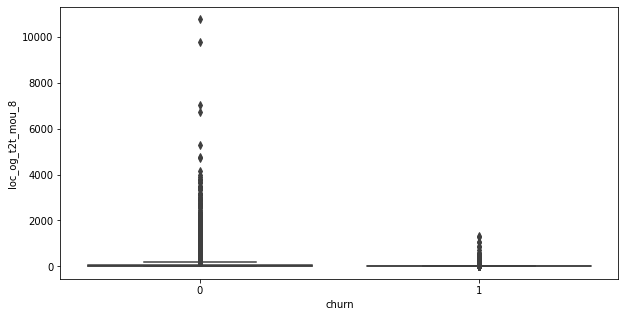

loc_og_t2m_mou_8


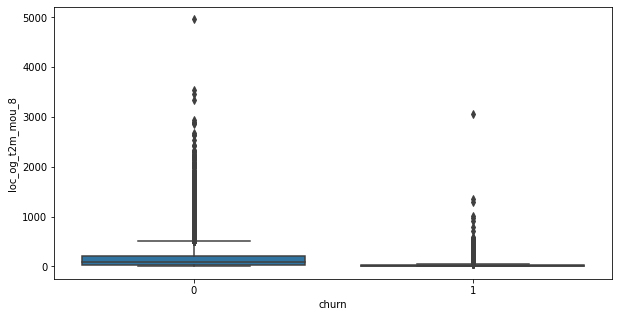

loc_og_t2f_mou_8


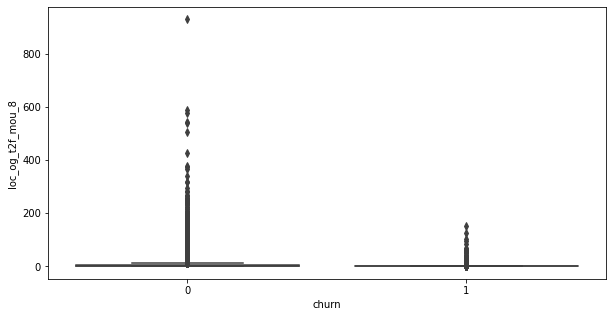

loc_og_t2c_mou_8


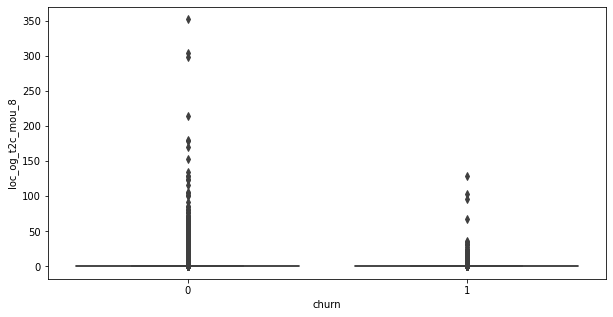

loc_og_mou_8


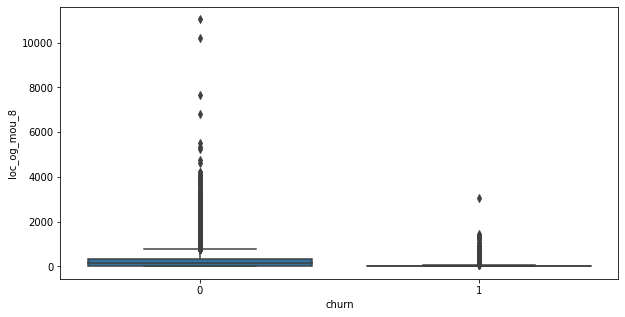

std_og_t2t_mou_8


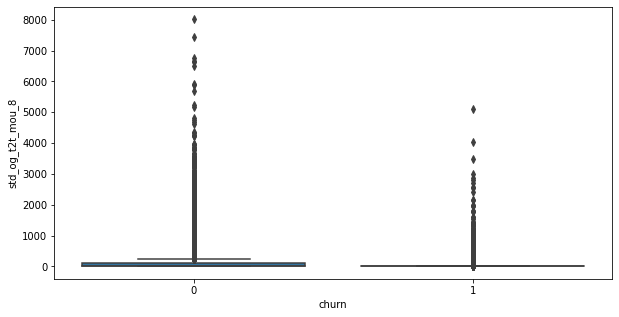

std_og_t2m_mou_8


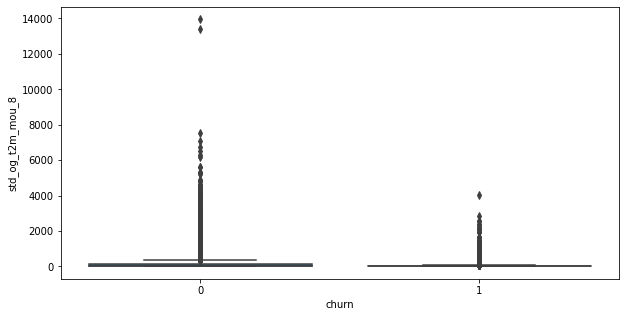

std_og_t2f_mou_8


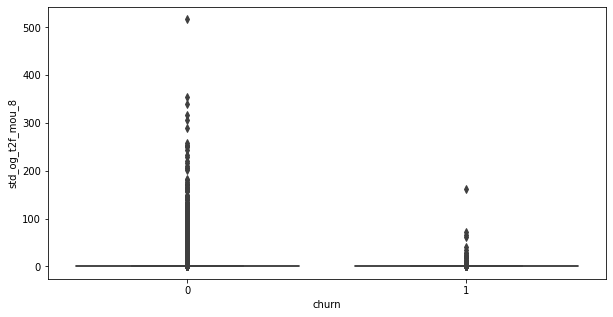

std_og_mou_8


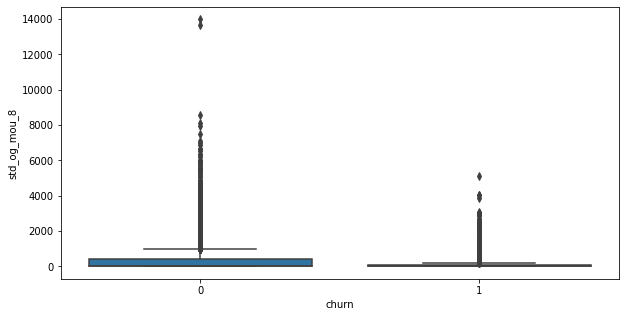

isd_og_mou_8


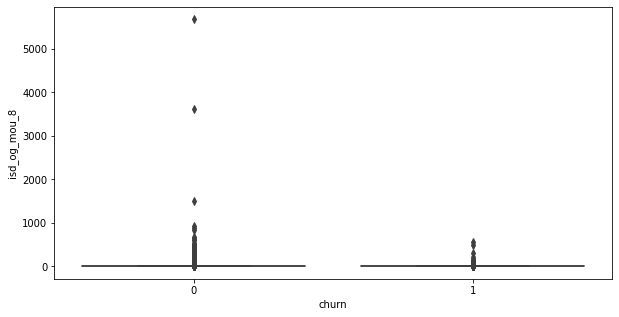

spl_og_mou_8


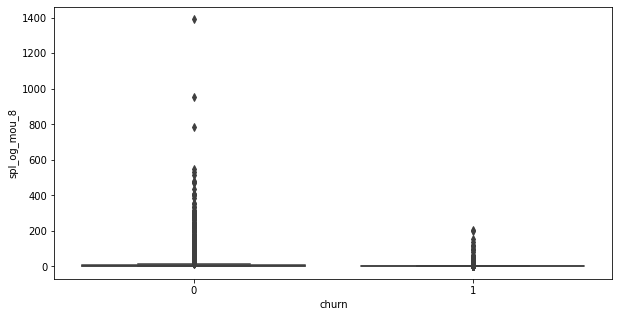

og_others_8


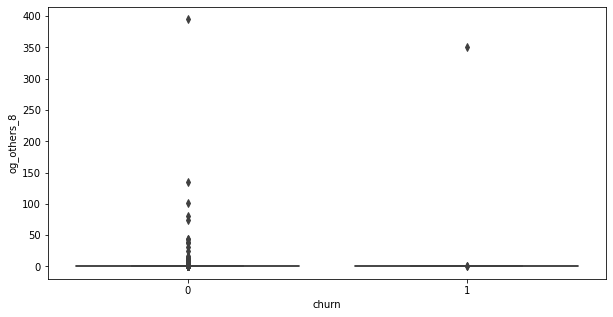

total_og_mou_8


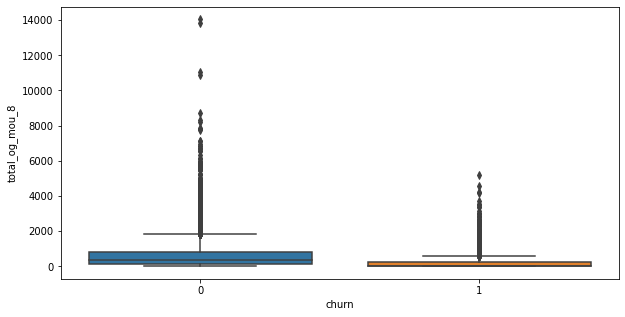

loc_ic_t2t_mou_8


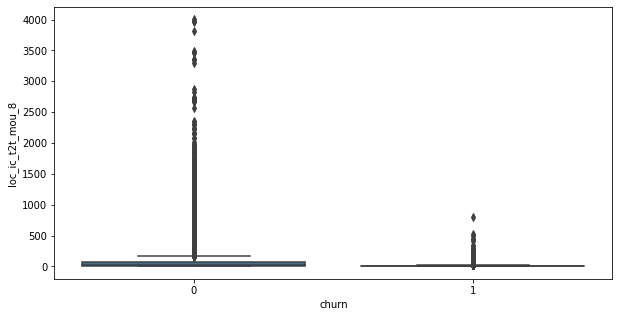

loc_ic_t2m_mou_8


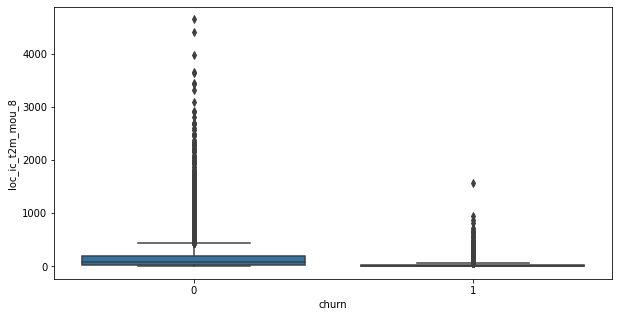

loc_ic_t2f_mou_8


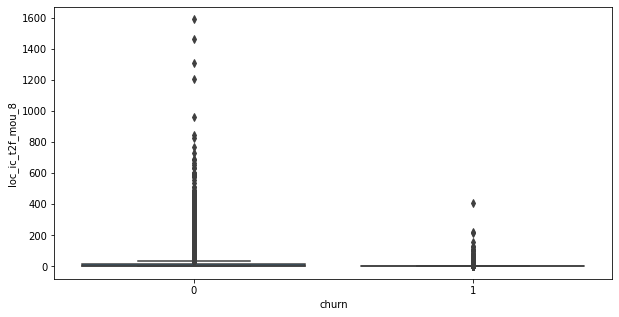

loc_ic_mou_8


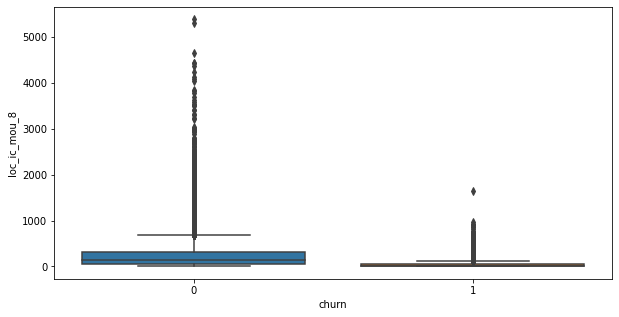

std_ic_t2t_mou_8


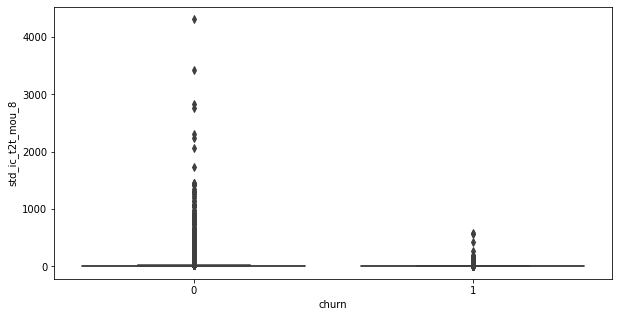

std_ic_t2m_mou_8


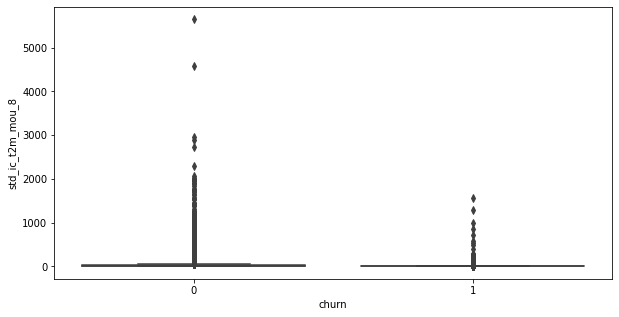

std_ic_t2f_mou_8


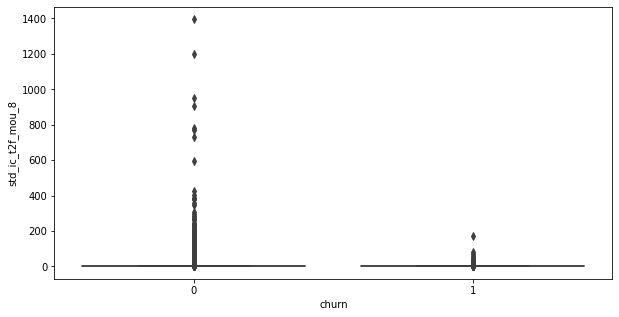

std_ic_mou_8


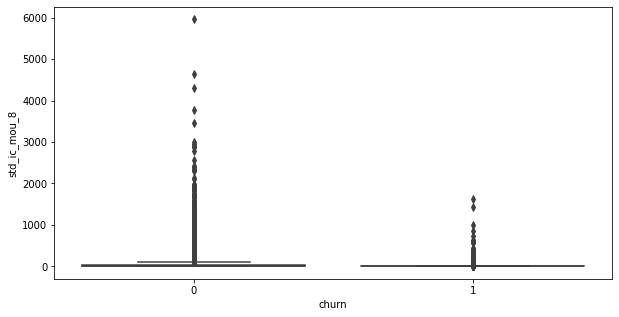

total_ic_mou_8


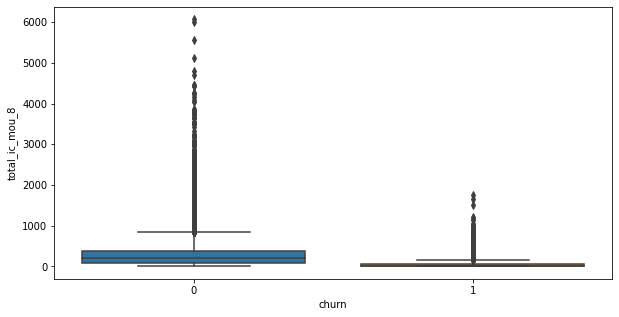

spl_ic_mou_8


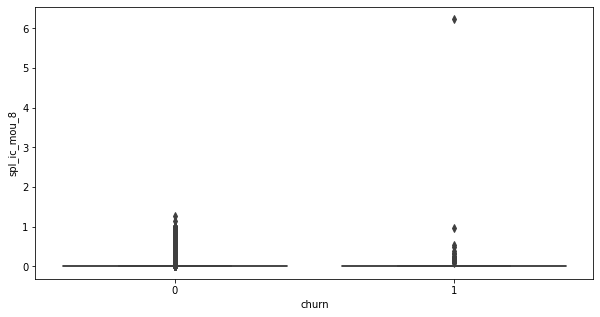

isd_ic_mou_8


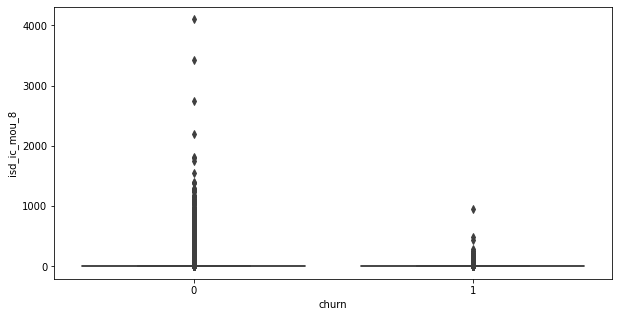

ic_others_8


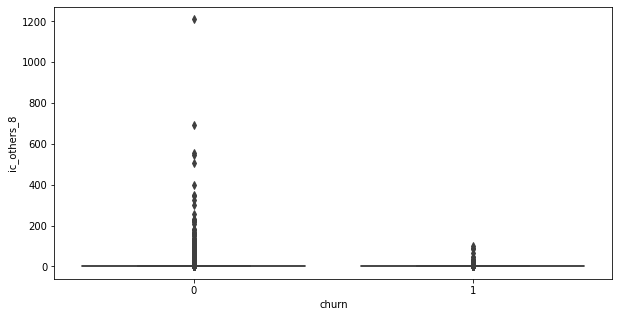

total_rech_num_8


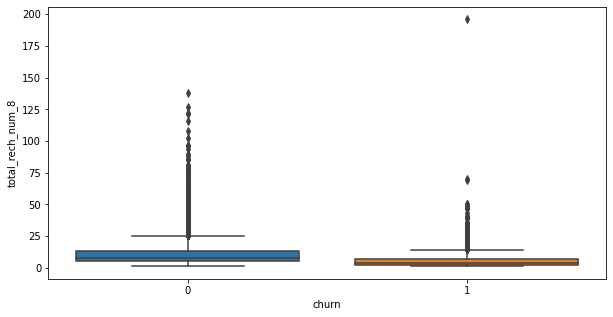

total_rech_amt_8


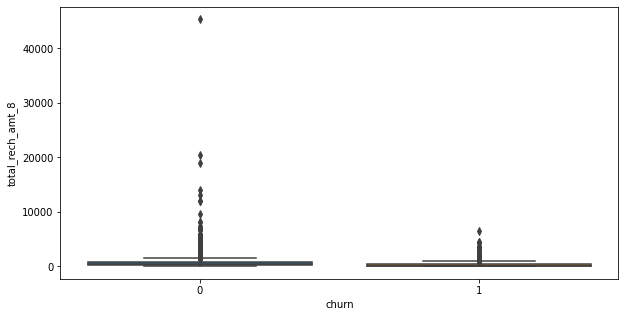

max_rech_amt_8


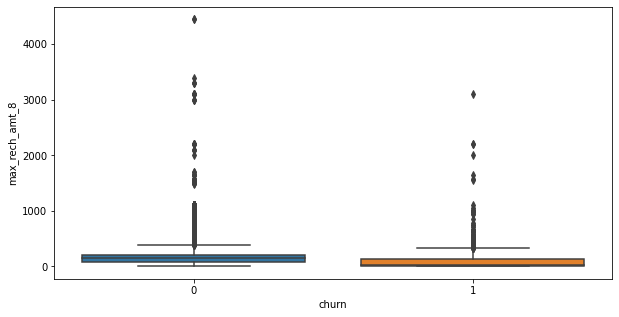

last_day_rch_amt_8


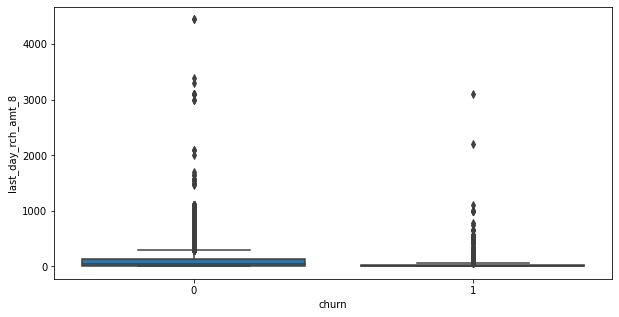

total_rech_data_8


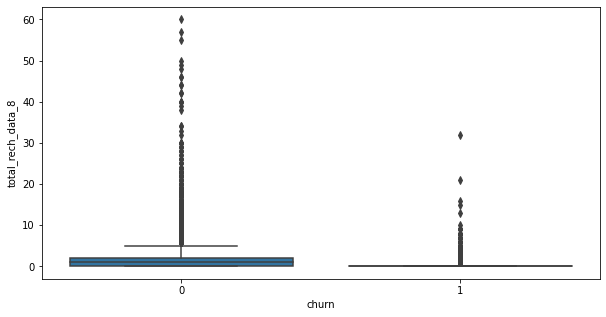

max_rech_data_8


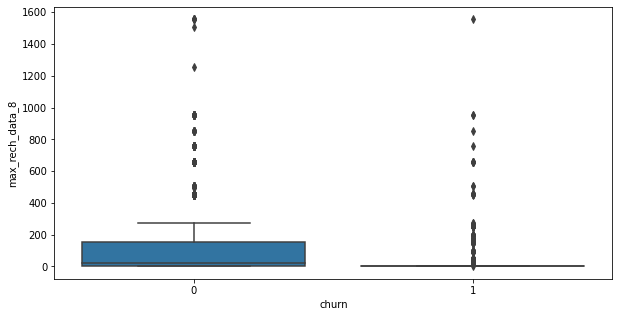

count_rech_2g_8


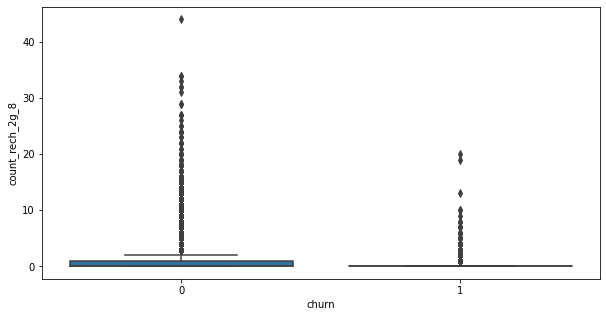

count_rech_3g_8


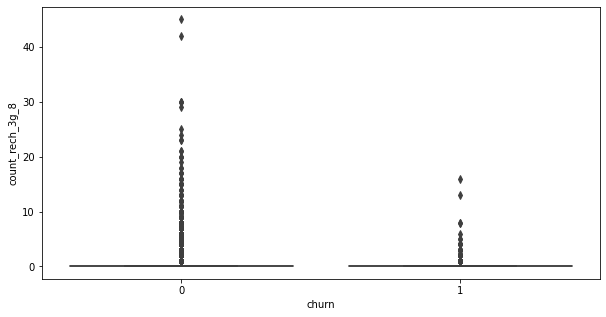

av_rech_amt_data_8


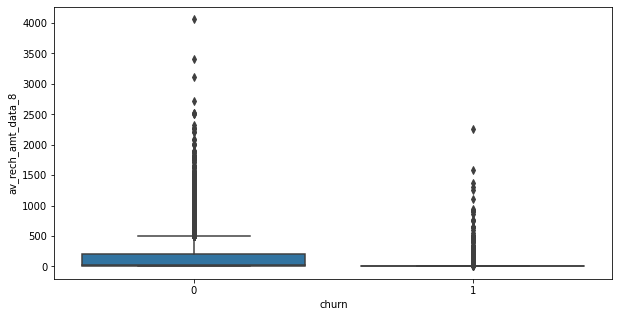

vol_2g_mb_8


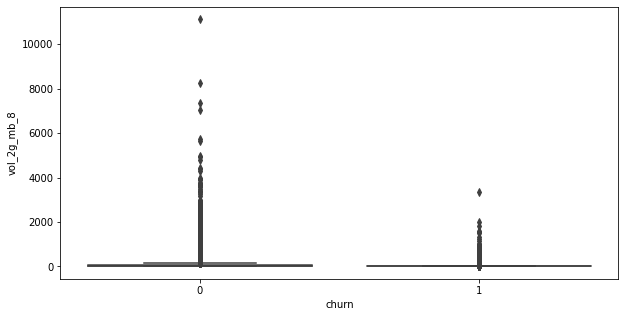

vol_3g_mb_8


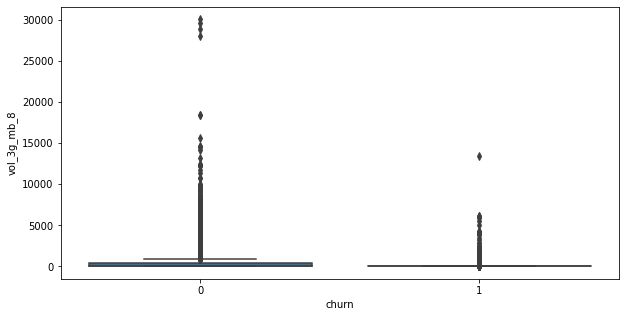

arpu_3g_8


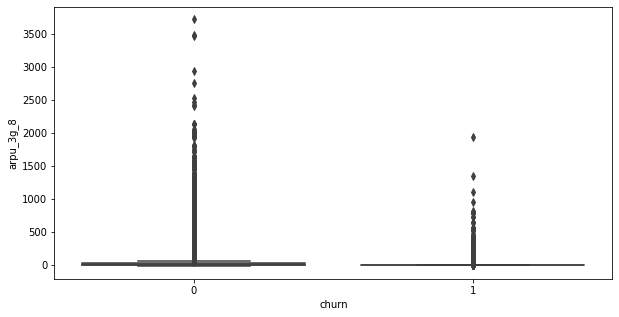

arpu_2g_8


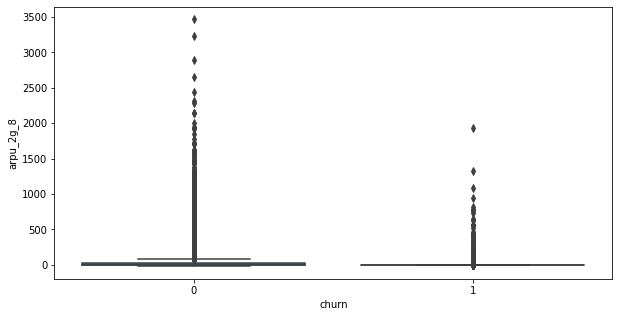

monthly_2g_8


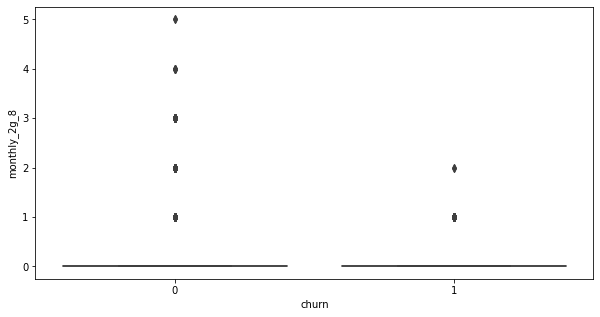

sachet_2g_8


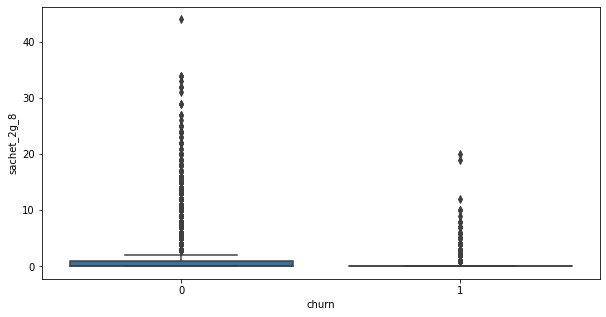

monthly_3g_8


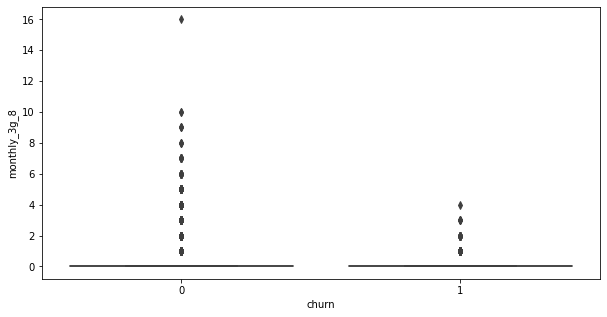

sachet_3g_8


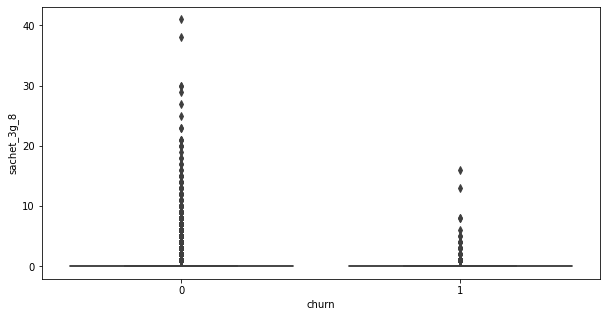

fb_user_6


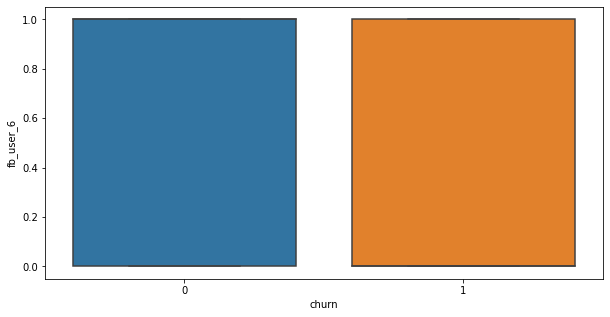

fb_user_7


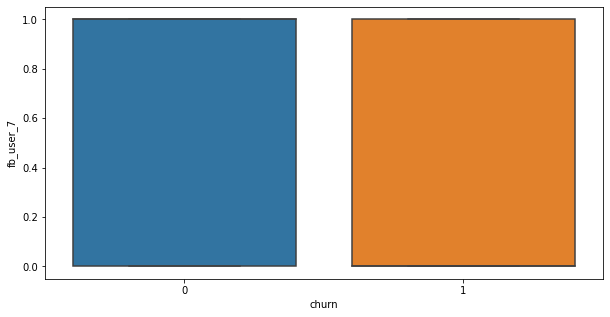

fb_user_8


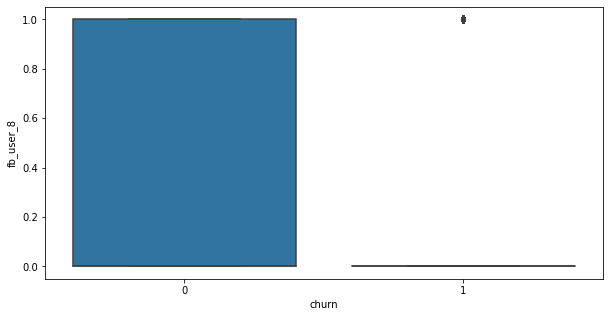

aon


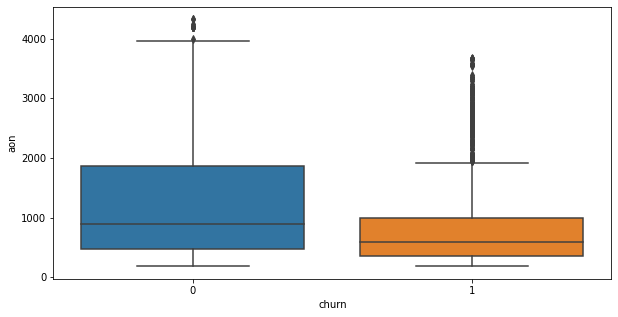

aug_vbc_3g


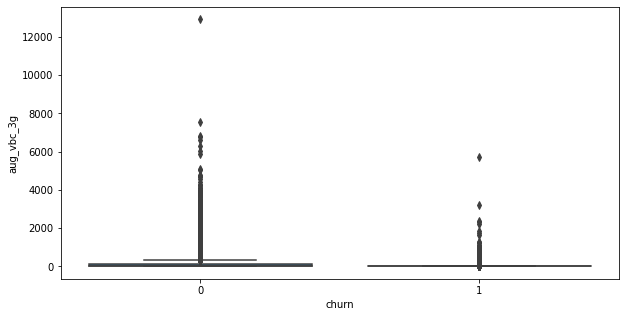

jul_vbc_3g


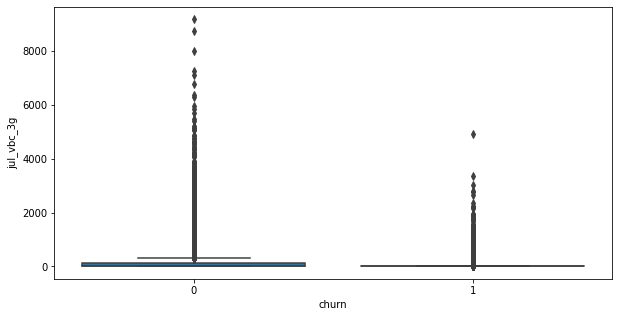

jun_vbc_3g


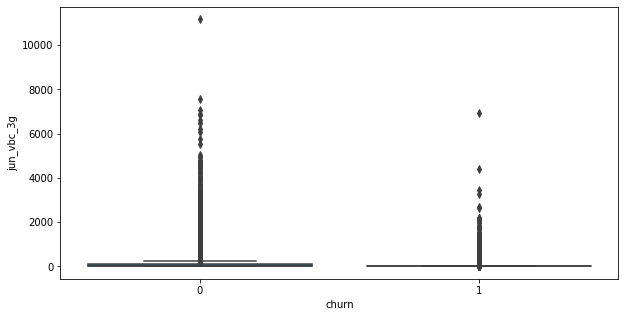

sep_vbc_3g


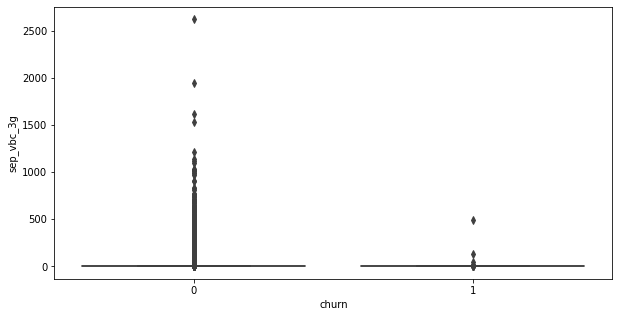

voice_recharge_good


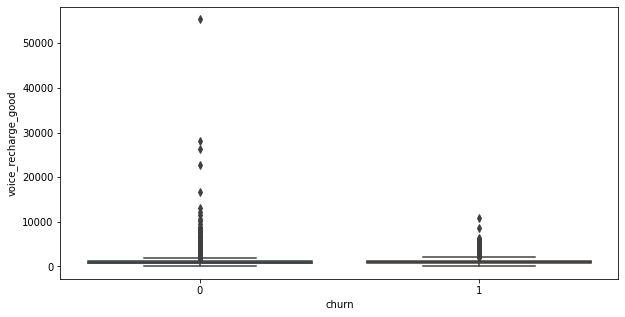

data_recharge_good


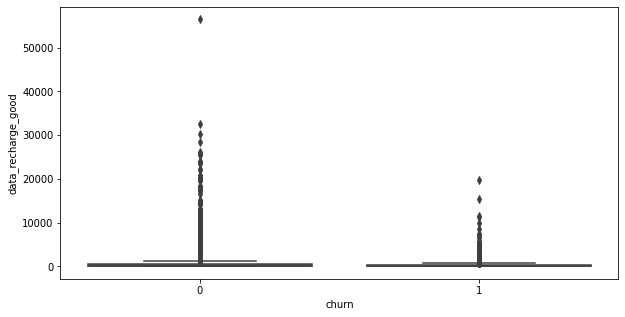

rech_amt_good


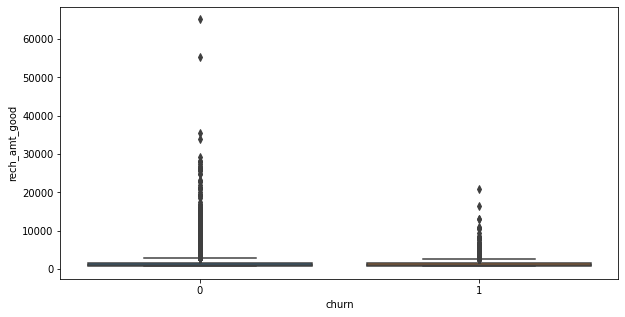

highvalcust


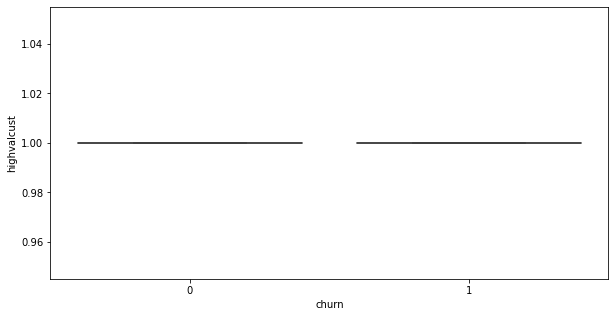

arpu_good


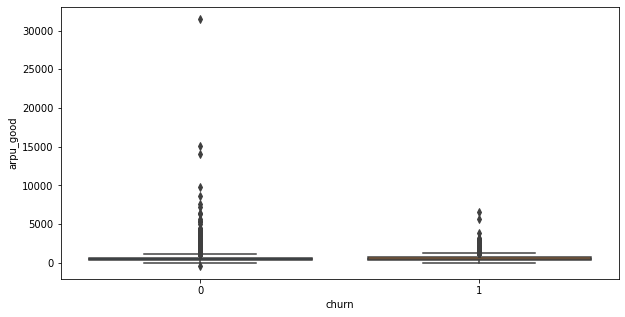

onnet_mou_good


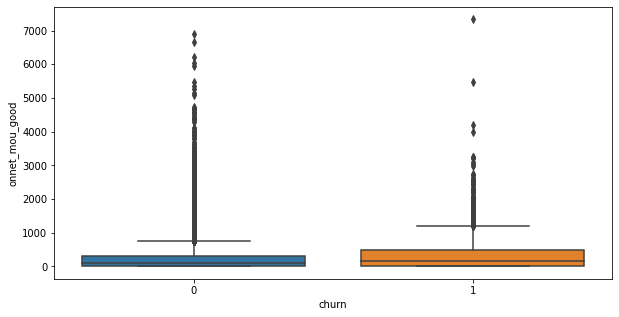

offnet_mou_good


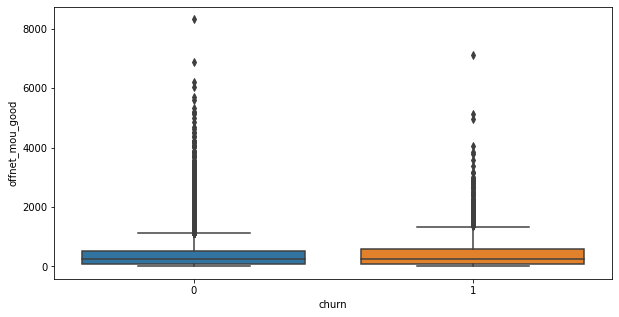

roam_ic_mou_good


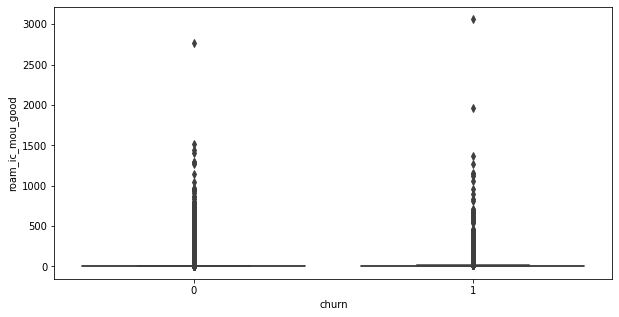

roam_og_mou_good


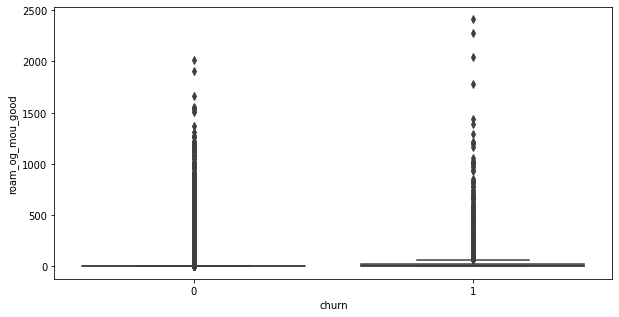

loc_og_t2t_mou_good


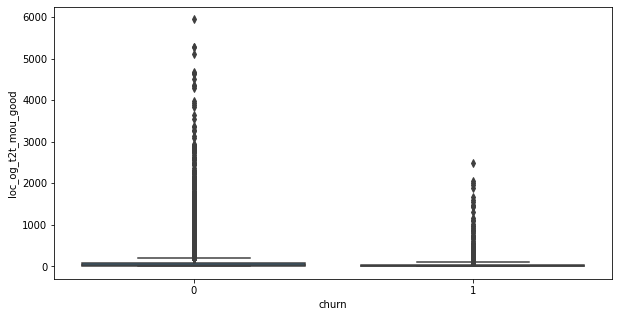

loc_og_t2m_mou_good


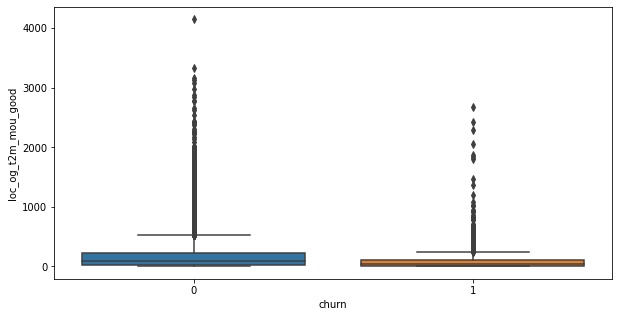

loc_og_t2f_mou_good


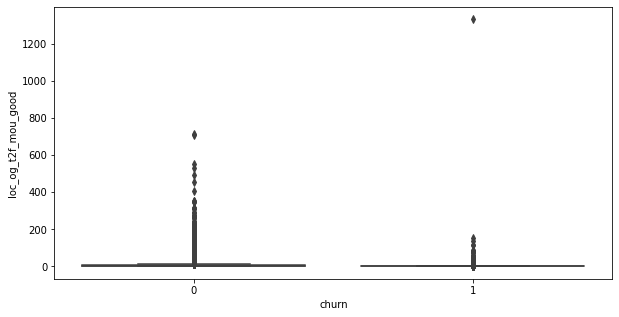

loc_og_t2c_mou_good


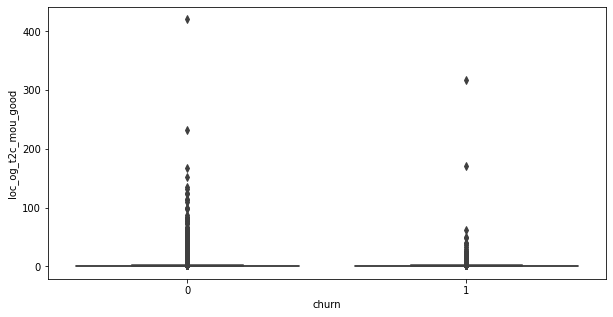

loc_og_mou_good


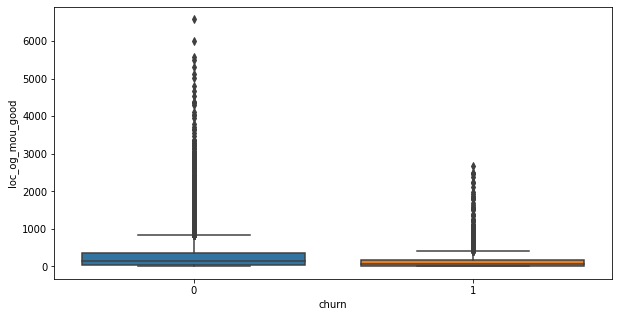

std_og_t2t_mou_good


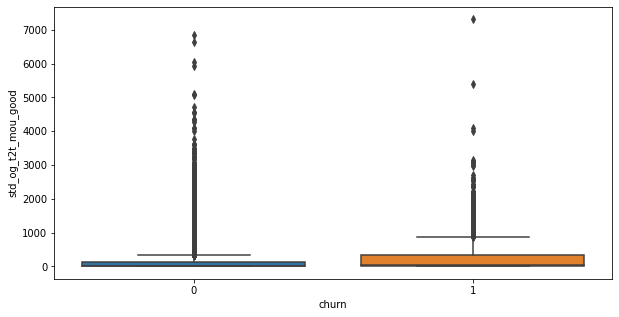

std_og_t2m_mou_good


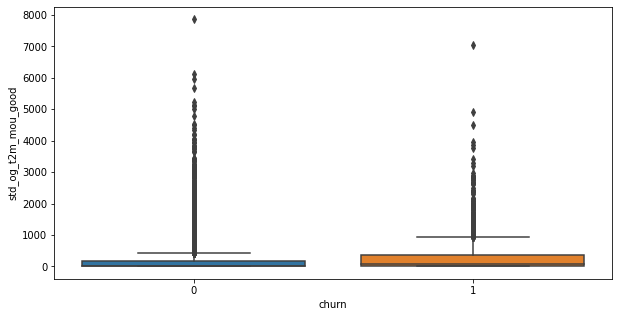

std_og_t2f_mou_good


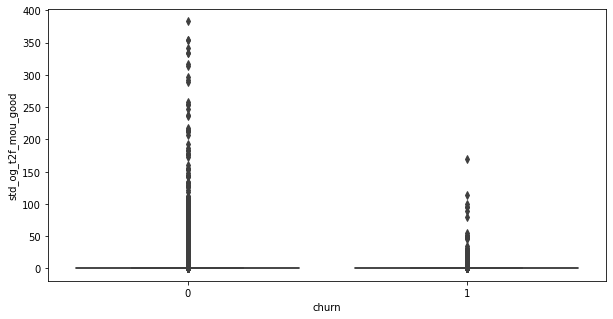

std_og_mou_good


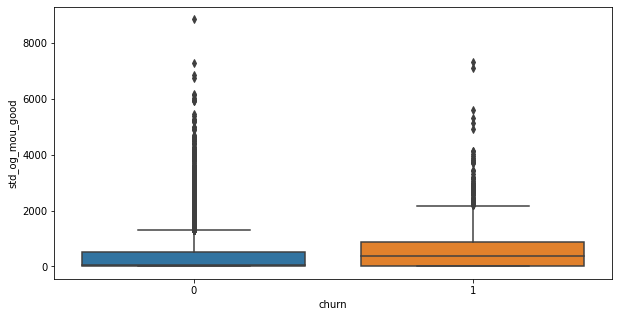

isd_og_mou_good


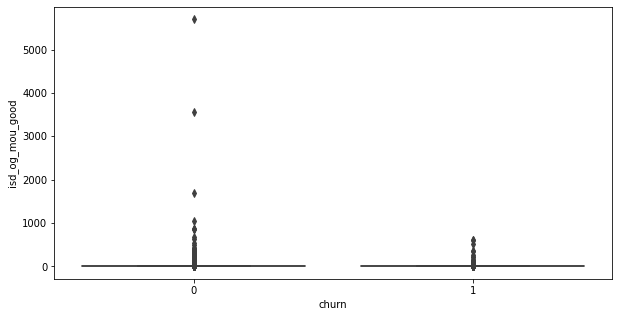

spl_og_mou_good


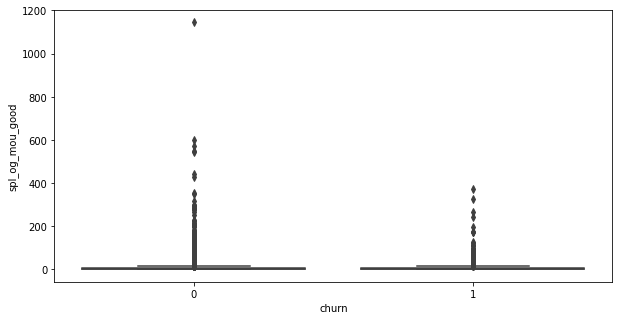

og_others_good


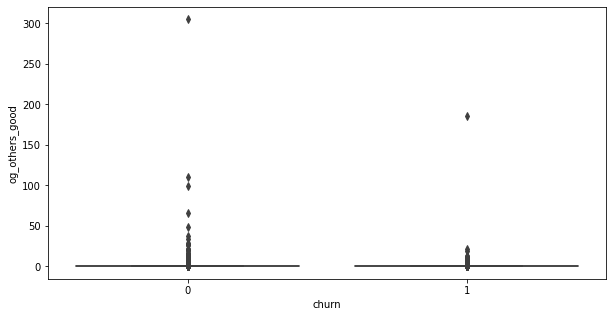

total_og_mou_good


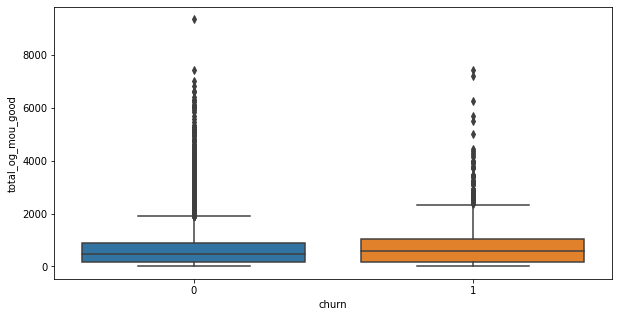

loc_ic_t2t_mou_good


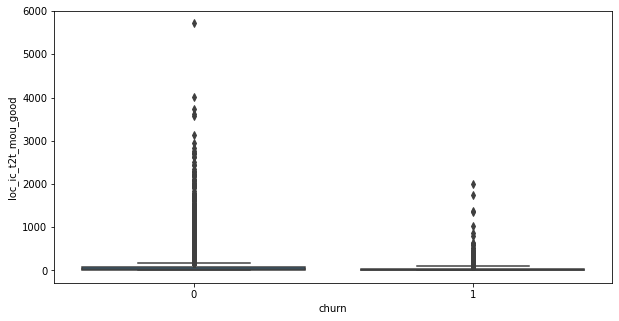

loc_ic_t2m_mou_good


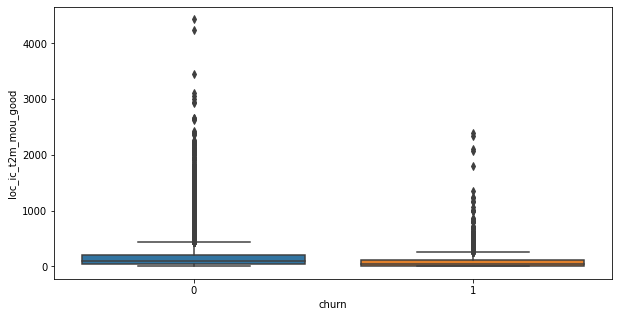

loc_ic_t2f_mou_good


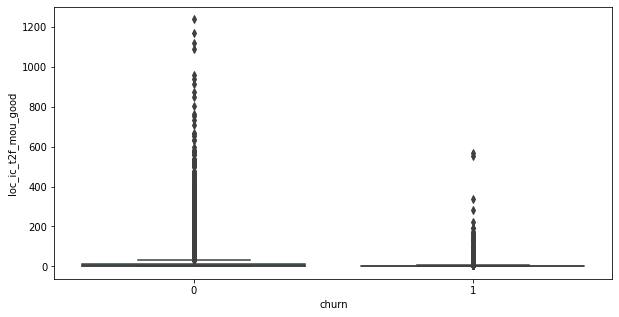

loc_ic_mou_good


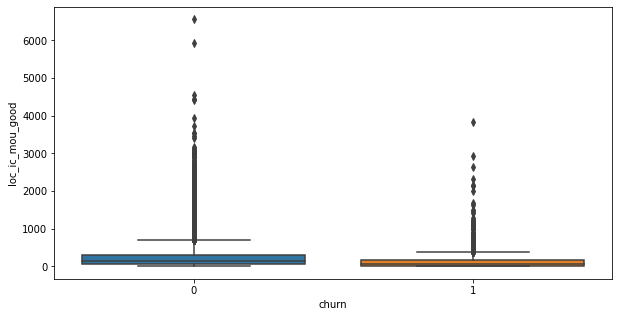

std_ic_t2t_mou_good


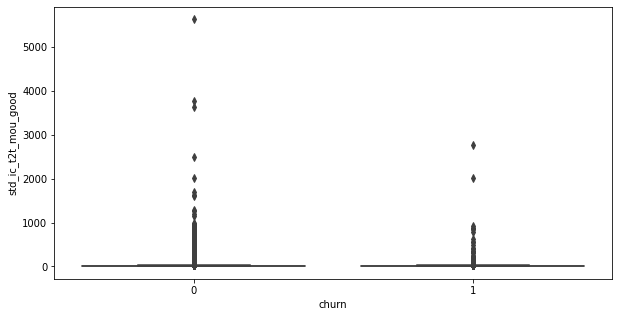

std_ic_t2m_mou_good


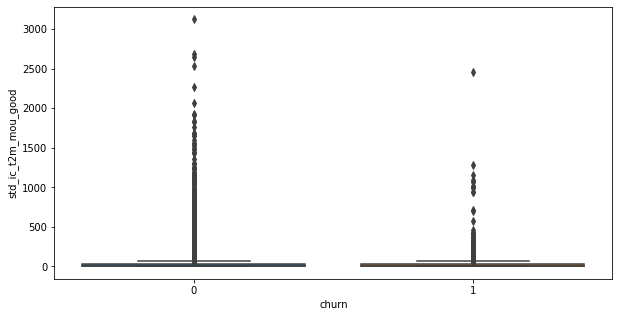

std_ic_t2f_mou_good


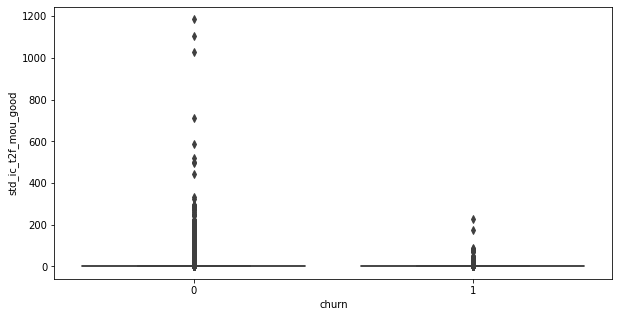

std_ic_mou_good


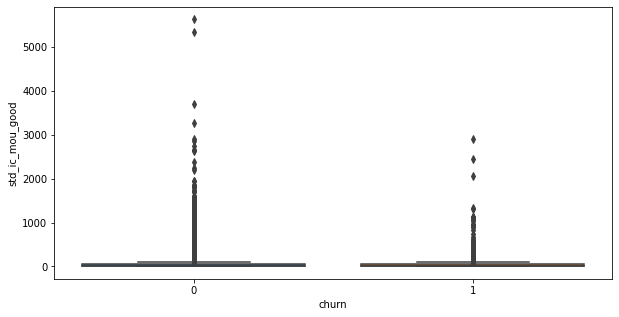

total_ic_mou_good


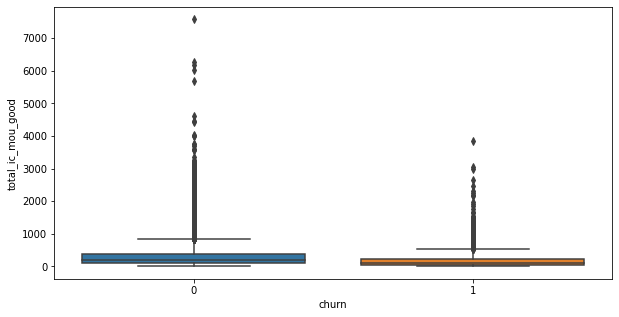

spl_ic_mou_good


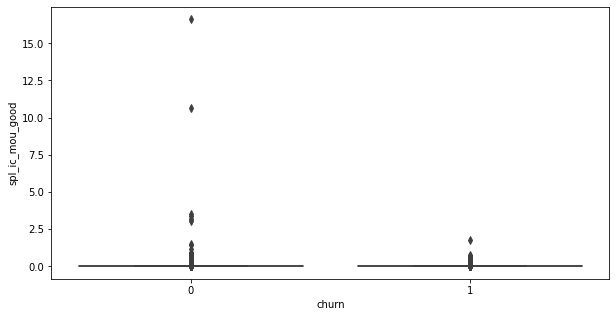

isd_ic_mou_good


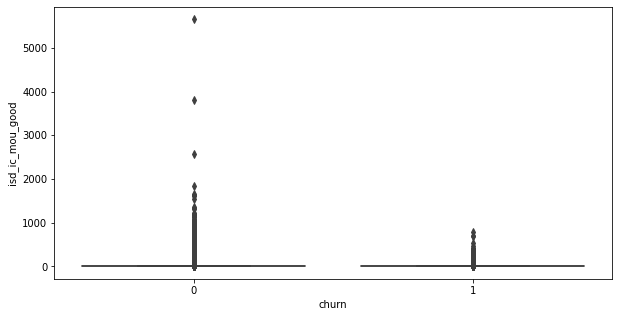

ic_others_good


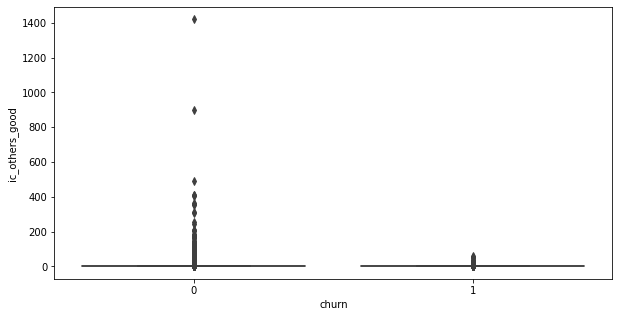

total_rech_num_good


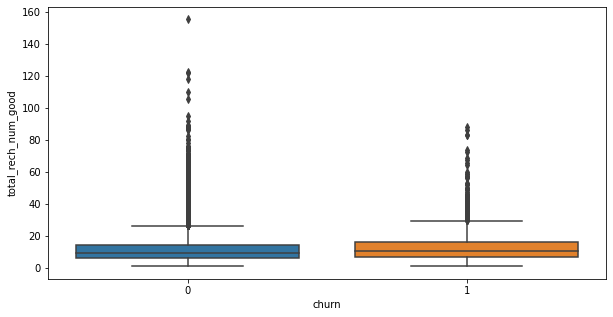

max_rech_amt_good


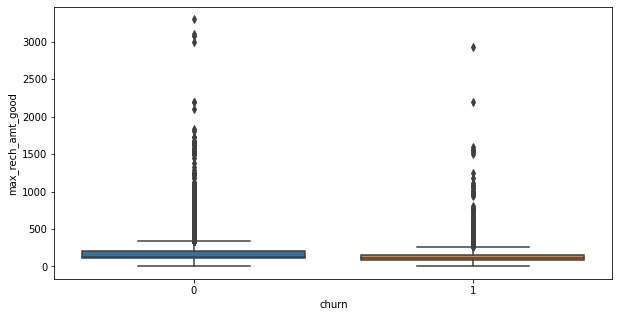

last_day_rch_amt_good


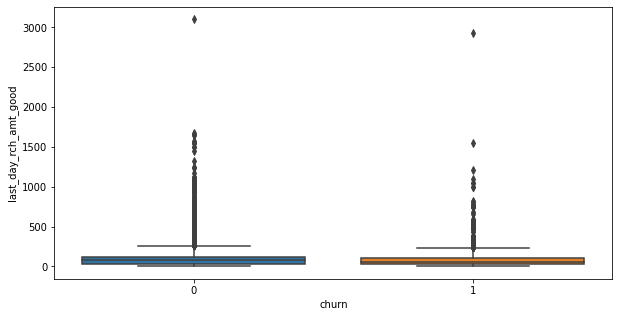

max_rech_data_good


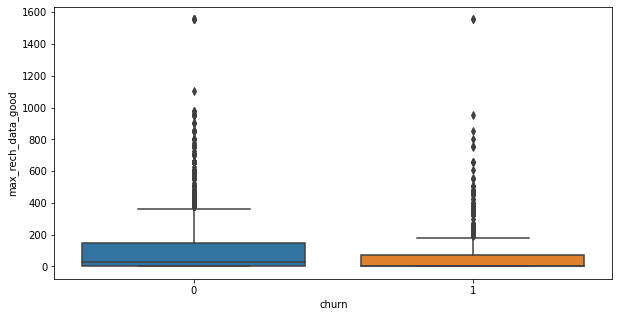

count_rech_2g_good


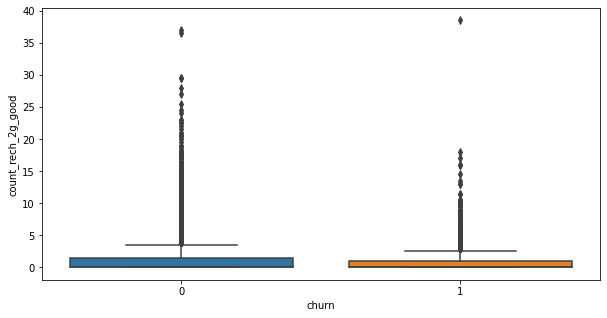

count_rech_3g_good


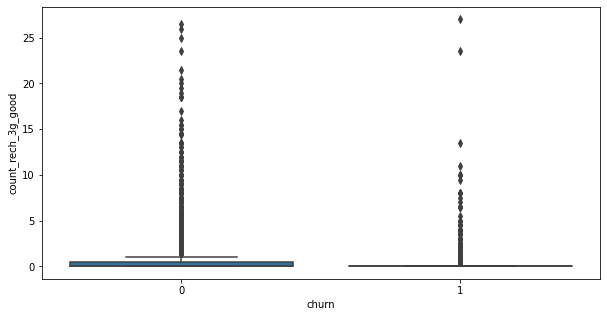

vol_2g_mb_good


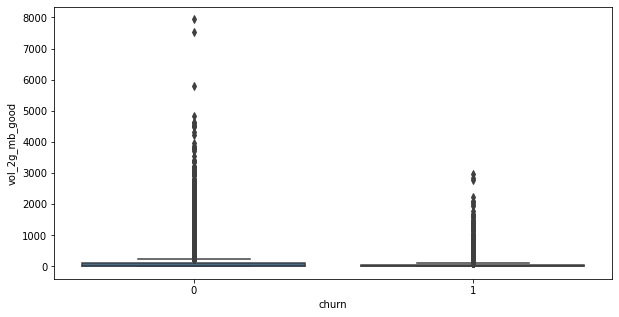

vol_3g_mb_good


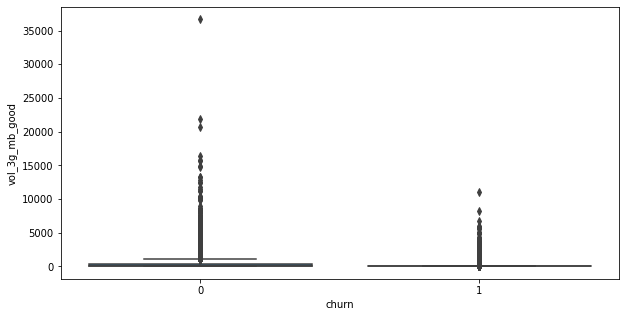

arpu_3g_good


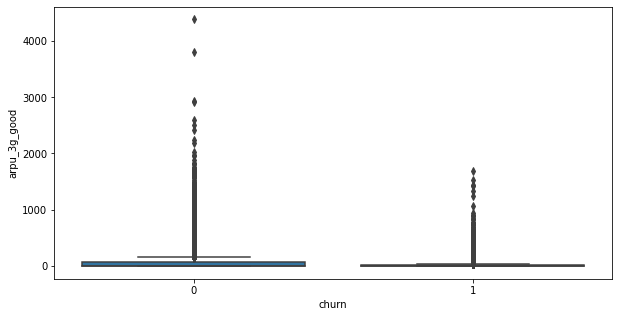

arpu_2g_good


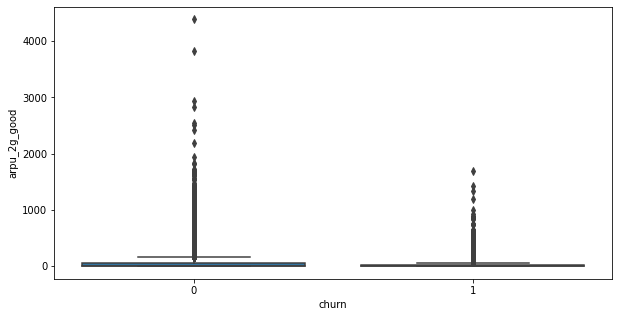

monthly_2g_good


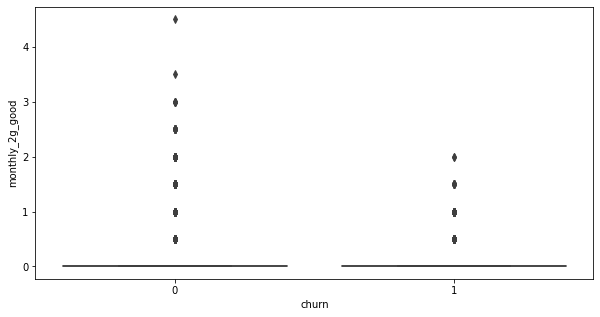

sachet_2g_good


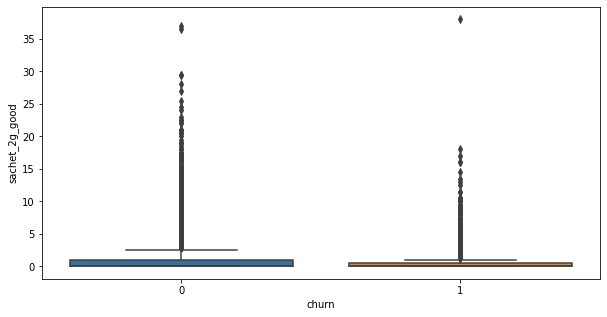

monthly_3g_good


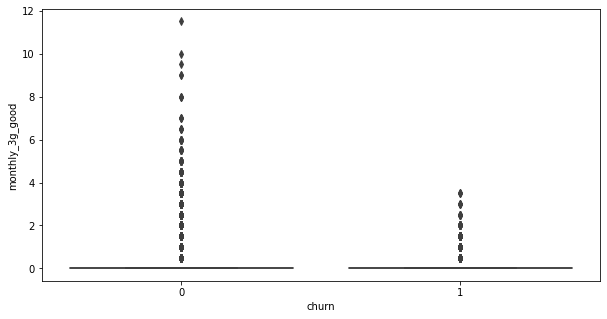

sachet_3g_good


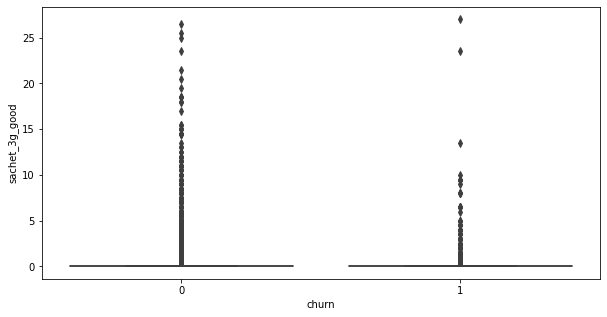

In [70]:
for i in columns_list:
    if(i != 'churn'):
        print(i)
        plot_categorical_data(df,'churn',i)
plt.show()

As per the above box plot analysis, below columns can be dropped:
1. circle_id
2. loc_og_t2o_mou
3. std_og_t2o_mou
4. loc_ic_t2o_mou
5. highvalcust

In [71]:
df = df.drop(['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','highvalcust'],axis=1)

In [72]:
df.shape

(29228, 110)

**As per assignment guidelines** <br>
We will be focusing on usage based churn. Hence below featues related to revenue will be dropped.
1. total_rech_num_8
2. total_rech_amt_8
3. max_rech_amt_8
4. total_rech_data_8
5. max_rech_data_8
6. count_rech_2g_8
7. count_rech_3g_8
8. av_rech_amt_data_8
9. voice_recharge_good
10. data_recharge_good
11. rech_amt_good
12. total_rech_num_good
13. max_rech_amt_good
14. max_rech_data_good
15. count_rech_2g_good
16. count_rech_3g_good

In [73]:
list(df.columns)

['mobile_number',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'last_day_rch_amt_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'monthly_2g_8',
 'sachet_2

In [74]:
columns_list=df.select_dtypes(exclude=['object']).columns.to_list()
for  column in columns_list:
    if 'rech' in column:
        print(column)
        df = df.drop(column,axis=1)
    elif 'arpu' in column:
        print(column)
        df = df.drop(column,axis=1)

arpu_8
total_rech_num_8
total_rech_amt_8
max_rech_amt_8
total_rech_data_8
max_rech_data_8
count_rech_2g_8
count_rech_3g_8
av_rech_amt_data_8
arpu_3g_8
arpu_2g_8
voice_recharge_good
data_recharge_good
rech_amt_good
arpu_good
total_rech_num_good
max_rech_amt_good
max_rech_data_good
count_rech_2g_good
count_rech_3g_good
arpu_3g_good
arpu_2g_good


In [75]:
df.shape

(29228, 88)

In [76]:
list(df.columns)

['mobile_number',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'aon',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'sep_vbc_3g',
 'churn',
 'onnet_mou_good',
 'offnet_mou_good',
 'roam_

**Removing all the Date Columns** <br>


In [77]:
date_columns=df.select_dtypes(include=['object']).columns.to_list()

In [78]:
print(date_columns)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [79]:
df=df.drop(date_columns,axis = 1)

In [80]:
df.shape

(29228, 82)

In [81]:
df.columns

Index(['mobile_number', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g', 'churn', 'onnet_mou_good', 'offnet_mou_good',
       'roam_ic_mou_good', 'roam_og_mou_good', 'loc_og_t2t_mou_good',
       'loc_og_t2m_mou_good', 'loc_og_t2f

In [82]:
df=df.drop('mobile_number',axis=1)

In [83]:
df.shape

(29228, 81)

In [84]:
to_categorical = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6', 'fb_user_7', 'fb_user_8']   

**Outlier Treatment** <br>


In [85]:
#We will consider data only between 5th percentile and 95th percentile


**Creating Derived Columns: Diff = Action - Good** <br>


In [86]:
for  column in list(df.columns):
    if '_good' in column:
        column = column.replace('_good','')
        df['{}_diff'.format(column)] = df['{}_8'.format(column)] - df['{}_good'.format(column)]
        df = df.drop('{}_8'.format(column),axis=1)

In [87]:
#Prepare Model 1: without PCA: Sumiran

In [88]:
#Prepare Model 2: with PCA